In [9]:
# !pip install --upgrade pip
# !pip install mysql
import pandas as pd
import seaborn as sns
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

In [10]:
config = {
  'host':'elecsimresults2.mysql.database.azure.com',
  'user':'alexkell@elecsimresults2',
  'password':'b3rz0s4m4dr1dth3h01113s!',
  'database':'elecsimbeisresults',
  'ssl_ca':'/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/run/validation-optimisation/database/BaltimoreCyberTrustRoot.crt.pem'
}

conn = mysql.connector.connect(**config)

In [11]:
ga_results = pd.read_sql('SELECT * FROM validoptimresults1', con=conn)
ga_results

,id,run_number,time_taken,timestamp_start,timestamp_end,reward,individual_m_1,individual_c_1,individual_m_2,individual_c_2,...,individual_m_17,individual_c_17,attr_nuclear_sub,attr_future_price_uncertainty_c,attr_future_price_uncertainty_m,coal,nuclear,ccgt,wind,solar
0,1,1,0.0,0.0,0.0,99999999.0,0.001824,8.689415,0.001574,28.903623,...,0.000872,11.318334,95.931782,2.993644,2.006188,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
1,2,1,0.0,0.0,0.0,99999999.0,0.001559,-19.944677,0.002831,-28.614112,...,0.002423,-21.860575,117.398593,6.876933,2.630165,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
2,3,1,0.0,0.0,0.0,79689.0,0.000887,19.481049,0.002815,-7.672696,...,0.002340,1.062284,60.020407,4.966992,2.262485,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
3,4,1,0.0,0.0,0.0,79689.0,0.001396,7.147626,0.000557,18.760615,...,0.001241,23.642314,51.082792,0.000000,2.644891,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
4,5,1,0.0,0.0,0.0,99999999.0,0.001571,-8.354935,0.001749,-15.155208,...,0.000257,-16.873417,74.628903,4.044822,8.843731,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
5,6,1,0.0,0.0,0.0,79689.0,0.002155,-12.209434,0.000591,38.571102,...,0.002246,17.113798,117.421756,1.777182,7.740889,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
6,7,1,0.0,0.0,0.0,79689.0,0.001559,-19.944677,0.002831,-28.614112,...,0.000405,-9.291561,117.398593,0.000000,2.630165,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
7,8,1,0.0,0.0,0.0,99999999.0,0.001699,28.879519,0.000910,-27.100157,...,0.002423,-21.860575,130.247586,1.343730,1.295591,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
8,9,1,0.0,0.0,0.0,99999999.0,0.001543,26.903983,0.000266,-10.188741,...,0.001779,-29.896585,119.992070,6.719496,4.015247,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
9,10,1,0.0,0.0,0.0,79689.0,0.002189,2.775184,0.001000,36.850438,...,0.002499,17.581623,114.335717,7.232392,1.083116,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0


In [12]:
ga_results.sort_values(by='reward')

,id,run_number,time_taken,timestamp_start,timestamp_end,reward,individual_m_1,individual_c_1,individual_m_2,individual_c_2,...,individual_m_17,individual_c_17,attr_nuclear_sub,attr_future_price_uncertainty_c,attr_future_price_uncertainty_m,coal,nuclear,ccgt,wind,solar
63,64,1,0.0,0.0,0.0,79689.0,0.001494,-1.894665,0.000698,-25.784471,...,0.000257,-16.873417,27.772548,5.945333,0.728900,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
79,80,1,0.0,0.0,0.0,79689.0,0.001720,-7.566477,0.001391,-12.650895,...,0.002880,4.042240,23.099835,2.818277,7.118802,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
77,78,1,0.0,0.0,0.0,79689.0,0.001383,39.290250,0.002100,39.131001,...,0.002382,27.748852,103.961545,4.814829,7.691814,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
75,76,1,0.0,0.0,0.0,79689.0,0.001524,38.277528,0.000196,13.080982,...,0.000119,-4.323786,44.123430,7.367985,6.374744,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
74,75,1,0.0,0.0,0.0,79689.0,0.000542,-9.456839,0.000431,-22.400956,...,0.001363,-7.156908,19.954626,1.579053,0.602041,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
73,74,1,0.0,0.0,0.0,79689.0,0.001494,0.000000,0.000698,-25.784471,...,0.000481,0.000000,0.000000,0.194148,4.608691,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
72,73,1,0.0,0.0,0.0,79689.0,0.002774,49.867628,0.001955,-11.516423,...,0.001868,2.905823,27.772548,5.945333,0.728900,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
71,72,1,0.0,0.0,0.0,79689.0,0.001963,2.394189,0.000539,11.115305,...,0.001307,-0.848064,133.057915,3.115486,5.649010,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
66,67,1,0.0,0.0,0.0,79689.0,0.000434,29.146242,0.001892,-3.762365,...,0.001756,37.293869,34.084814,0.407497,2.023201,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
62,63,1,0.0,0.0,0.0,79689.0,0.001571,-12.209434,0.000591,38.571102,...,0.001868,2.905823,74.628903,4.044822,8.843731,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0


In [30]:
# ga_results_small = ga_results[ga_results.reward<100000]
# sns.distplot(ga_results_small.reward, hue="run_number")

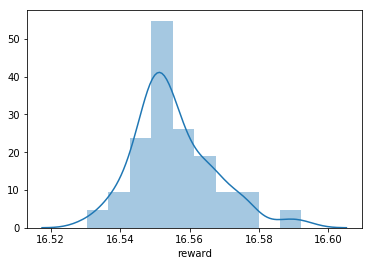

In [31]:
sns.distplot(ga_results_small[ga_results_small.run_number==2].reward)

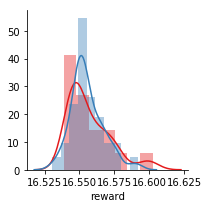

In [32]:
g = sns.FacetGrid(ga_results_small, hue="run_number", palette="Set1")
g = (g.map(sns.distplot, "reward"))